# **How can we *accurately predict house prices* in different Indian cities *based on property features*?**

The Indian real estate market is dynamic, influenced by various factors. Buyers and investors often struggle to determine fair prices, while sellers and real estate developers seek accurate valuations to maximize profits.

## **Why Is This Problem Important?**
For buyers, an overpriced property means financial strain, and for investors, it means lower profits.
Accurate house price prediction will:
  1. Help Investors negotiate better deals and choose the right location.
  2. Assist investors in spotting undervalued areas with high ROI potential.
  3. Reduce the risk of market speculation and misleading price trends

## **How solving this problem will benefit the company?**
Buyers get fair deals based on data, not speculation. And they could increase their profits

## **How would you collect relevant data?**

To make informed decisions, we need a comprehensive dataset covering:

1. Real Estate Listings
2. Government Data
3. Economic Indicators
4. Local Infrastructure Data
5. Historical Transactions

### *Data Link : https://www.kaggle.com/datasets/juhibhojani/house-price*

## **How would you formulate this problem as a machine learning task?**
This will be Supervised Learning Regression Problem, as we aim to predict a continuous variable (house price).

Target Variable: Amount (in rupees)

Features (Independent Variables):

- Location-based: City, Neighborhood, Proximity to key amenities
- Property-based: Carpet area, Super area, Number of bedrooms, Floor level
- Market-based: Transaction type (Resale/New), Ownership type
- External Factors: Facing direction, Overlooking (Garden/Main Road)

### **We will take folowing futher ML Steps after our Business Question**

1. Data Collection
2. Data Exploration
3. Data Prepocessing
4. Feature Engineering
5. Model Training
6. Model Evaluation


### **Importing Essential Libraries**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Stage 1️⃣ : Data Collection**

1. Load the Data
2. Understand Columns
3. Quick Preview to understand

In [2]:
df_original = pd.read_csv('/Users/dev/Documents/Projects/House Price Prediction ML Modal/data/house_prices.csv.zip')

#Shape & Size of data set
print(f'Original Dataset Shape : {df_original.shape} & Original Dataset size : {df_original.size}')

Original Dataset Shape : (187531, 21) & Original Dataset size : 3938151


In [3]:
df_original['Title'] = df_original['Title'].str.lower()
df_original['Description'] = df_original['Description'].str.lower()
df_original['BHK'] = pd.to_numeric(
    df_original['Title'].str.extract(r'(\d+)\s*bhk', expand=False),
    errors='coerce'
)
df_original['BHK'].dtype
   

dtype('float64')

In [4]:
#Train Test Split
df_train, df_test = train_test_split(df_original, test_size=0.3, random_state=42)

#Size & Size of Train & Test
print(f'Train Dataset Shape : {df_train.shape} & Train Dataset Shape : {df_train.shape}','\n')
print(f'Test Dataset Shape : {df_test.shape} & Test Dataset Shape : {df_test.shape}','\n','- '*75)

#Look on columns datatypes
print(df_train.dtypes,'\n','- '*75)

#Preview last 5 rows
pd.set_option('display.max_columns', None)
df_train.tail()

Train Dataset Shape : (131271, 22) & Train Dataset Shape : (131271, 22) 

Test Dataset Shape : (56260, 22) & Test Dataset Shape : (56260, 22) 
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Index                  int64
Title                 object
Description           object
Amount(in rupees)     object
Price (in rupees)    float64
location              object
Carpet Area           object
Status                object
Floor                 object
Transaction           object
Furnishing            object
facing                object
overlooking           object
Society               object
Bathroom              object
Balcony               object
Car Parking           object
Ownership             object
Super Area            object
Dimensions           float64
Plot Area            float64
BHK                  float64
dtype: object 
 - - - - - - - - - - - - - - - - - - - - - - - - - -

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,BHK
119879,119879,1 bhk ready to occupy flat for sale in rwa khi...,this attractive 1 bhk apartment can be found f...,Call for Price,NaN,new-delhi,NaN,Ready to Move,2 out of 4,Resale,Semi-Furnished,North,NaN,RWA Khirki Ext,1,1,NaN,Freehold,494 sqft,NaN,NaN,1.0
103694,103694,2 bhk ready to occupy flat for sale action area i,"2 bhk, builder floor apartment is available fo...",68 Lac,6182.0,kolkata,890 sqft,Ready to Move,2 out of 4,Resale,Unfurnished,North - East,NaN,NaN,2,1,NaN,Freehold,NaN,NaN,NaN,2.0
131932,131932,3 bhk ready to occupy flat for sale in kesarwa...,this ready to move-in 3 bhk flat is available ...,2.20 Cr,12222.0,new-delhi,1600 sqft,Ready to Move,6 out of 8,Resale,Semi-Furnished,North - East,"Garden/Park, Main Road",Kesarwani Apartment,3,3,"1 Covered,",Freehold,NaN,NaN,NaN,3.0
146867,146867,1 bhk ready to occupy flat for sale in vijay g...,"waghbil, thane has an attractive 1 bhk flat fo...",76 Lac,11259.0,thane,450 sqft,Ready to Move,13 out of 27,Resale,Semi-Furnished,North - East,"Garden/Park, Main Road",Vijay Galaxy,2,1,1 Covered,Co-operative Society,NaN,NaN,NaN,1.0
121958,121958,3 bhk ready to occupy flat for sale in defence...,creatively planned and constructed is a 3 bhk ...,1.58 Cr,9875.0,new-delhi,1300 sqft,Ready to Move,5 out of 7,Resale,Semi-Furnished,East,Garden/Park,Defence Officers Apartment,2,2,"1 Covered,",Freehold,NaN,NaN,NaN,3.0


# **Stage 2️⃣ : Data Exploration**

In [5]:
#Total Duplicates
print(f'Total Duplicates in Train Dataset : {df_train.duplicated().sum()}')

#Total Null
print(f'Total Nulls in Train Dataset : {df_train.isna().sum().sum()}','\n','- '*75)

#Statistical Analysis
df_train.describe(include='all').T

Total Duplicates in Train Dataset : 0
Total Nulls in Train Dataset : 752486 
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Index,131271.0,NaN,NaN,NaN,93631.553915,54105.37878,1.0,46853.5,93606.0,140307.5,187530.0
Title,131271,25580,2 bhk ready to occupy flat for sale in divyasr...,1466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,129111,46353,multistorey apartment is available for sale. i...,1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount(in rupees),131271,1484,Call for Price,6791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price (in rupees),118920.0,NaN,NaN,NaN,7559.136319,26137.889071,0.0,4299.0,6034.0,9462.25,6700000.0
location,131271,81,new-delhi,19323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carpet Area,74816,2471,1000 sqft,3646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,130845,1,Ready to Move,130845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Floor,126341,887,2 out of 4,8750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transaction,131212,4,Resale,100775,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Function to analyse all Explicit & Implicit null values, Unique Values & Total Rows
def analyze_missing_value(df):
    summary = {
        "Column Name": df.columns.tolist() + ["Total"],
        "Data Type": [df[col].dtype for col in df.columns] + [": -"],
        "Unique Values": [df[col].nunique() for col in df.columns] + [""],
        "Total Rows": [len(df)] * (len(df.columns) + 1),
        "Explicit Nulls": [df[col].isna().sum() for col in df.columns] + [df.isna().sum().sum()],
    }

    implicit_nulls = []
    for col in df.columns:
        col_data = df[col].astype(str).str.strip()
        count = col_data.isin(["NA", "", "-", " ", "0", "0.0"]).sum()

        # Safely count numeric zero only if the column is numeric
        if pd.api.types.is_numeric_dtype(df[col]):
            count += (df[col] == 0).sum()
        implicit_nulls.append(count)

    total_implicit = sum(implicit_nulls)

    summary["Implicit Nulls"] = implicit_nulls + [total_implicit]

    summary["Total Nulls"] = [
        summary["Explicit Nulls"][i] + summary["Implicit Nulls"][i]
        for i in range(len(df.columns))
    ] + [summary["Explicit Nulls"][-1] + total_implicit]

    summary["Null Percentage"] = [
        round(((summary["Total Nulls"][i] / summary["Total Rows"][i]) * 100), 2)
        if summary["Total Rows"][i] != 0 else None
        for i in range(len(summary["Total Nulls"]))
    ]

    return pd.DataFrame(summary)

analyze_missing_value(df_train)

,Column Name,Data Type,Unique Values,Total Rows,Explicit Nulls,Implicit Nulls,Total Nulls,Null Percentage
0,Index,int64,131271,131271,0,0,0,0.00
1,Title,object,25580,131271,0,0,0,0.00
2,Description,object,46353,131271,2160,0,2160,1.65
3,Amount(in rupees),object,1484,131271,0,0,0,0.00
4,Price (in rupees),float64,9780,131271,12351,20,12371,9.42
5,location,object,81,131271,0,0,0,0.00
6,Carpet Area,object,2471,131271,56455,0,56455,43.01
7,Status,object,1,131271,426,0,426,0.32
8,Floor,object,887,131271,4930,0,4930,3.76
9,Transaction,object,4,131271,59,0,59,0.04


In [7]:
#Function to detect anomalies and inconsistent data types
def analyze_anomalies(df):
    # Initialize lists to store the summary
    summary = []
    inconsistent_dtype_count = 0  # Variable to count columns with inconsistent data types
    total_anomaly_count = 0  # Variable to sum up all anomaly counts

    for col in df.columns:
        dtype = df[col].dtype

        # Check for anomalies based on IQR for numeric columns
        if dtype in ['int64', 'float64']:
            # Calculate Q1 (25th percentile) and Q3 (75th percentile) for IQR
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            # Define the bounds for detecting outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Count anomalies where data points are outside the IQR bounds
            anomaly_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        else:
            anomaly_count = 0

        # Add anomaly count to the total
        total_anomaly_count += anomaly_count

        # Check for inconsistent data types in non-numeric columns
        if df[col].apply(type).nunique() > 1:
            mixed_data = 1  # Inconsistent data type found
            inconsistent_dtype_count += 1  # Increment the count for inconsistent datatypes
        else:
            mixed_data = 0  # No inconsistency

        # Append the result for the current column
        summary.append([col, dtype, anomaly_count, mixed_data])

    # Convert the summary into a DataFrame
    summary_df = pd.DataFrame(summary, columns=["Column Name", "Data Type", "Anomaly Count (IQR)", "Is Datatype Consistet"])

    # Add the total row
    summary_df.loc["Total"] = ["Total", "", total_anomaly_count, inconsistent_dtype_count]

    return summary_df

analyze_anomalies(df_train)

,Column Name,Data Type,Anomaly Count (IQR),Is Datatype Consistet
0,Index,int64,0,0
1,Title,object,0,0
2,Description,object,0,1
3,Amount(in rupees),object,0,0
4,Price (in rupees),float64,5492,0
5,location,object,0,0
6,Carpet Area,object,0,1
7,Status,object,0,1
8,Floor,object,0,1
9,Transaction,object,0,1


# **Stage 3️⃣ : Data Preprocessing**

## 📌`Duplicate Removal`

In [8]:
#Copying the values in cleaned set to prevent any loss in original dataset
df_train_cleaned = df_train.copy()
df_test_cleaned = df_test.copy()

# Remove duplicate rows from the DataFrame
print(f'Total Duplicates in Train Dataset : {df_train_cleaned.duplicated().sum()}')

#Remove Duplicate Values
df_train_cleaned = df_train_cleaned.drop_duplicates()
df_test_cleaned = df_test_cleaned.drop_duplicates()

Total Duplicates in Train Dataset : 0


## 📌 `Drop Unnecessary Columns`

1. Index : Used for Indexing
2. Price (in rupees) : Same as 'Amount (in Rupees)' and in df_train.head() we saw its not being converted well  
3. Dimensions : Complete Null
4. Plot Area : Complete Null
5. Status : Only one unique value
6. Car Parking - More than 50% is Null

Removing these below columns because of too much unique value so one-hot encodding is not possible, cant do label encoding since data is not ordinal
1. Title
2. Description
3. Society


In [9]:
#Removing
to_be_removed = ['Index','Price (in rupees)', 'Title', 'Description', 'Dimensions', 'Plot Area', 'Status','Society','Car Parking']

df_train_cleaned = df_train_cleaned.drop(to_be_removed, axis='columns')
df_test_cleaned = df_test_cleaned.drop(to_be_removed, axis='columns')

print(f"Orginal Columns Count : {df_original.shape[1]} ===> New Columns Count : {df_train_cleaned.shape[1]}")

#Renaming
# Apply title case to column names to capitalize the first letter of each word
df_train_cleaned.columns = df_train_cleaned.columns.str.title()
df_test_cleaned.columns = df_test_cleaned.columns.str.title()

#'Amount (in rupees)' to 'Price'
df_train_cleaned = df_train_cleaned.rename(columns={'Amount(In Rupees)': 'Price'})
df_test_cleaned = df_test_cleaned.rename(columns={'Amount(In Rupees)': 'Price'})

#Remvoing blanks in null


Orginal Columns Count : 22 ===> New Columns Count : 13


## 📌`Missing Value Fill`

/var/folders/xp/h8tpxl79665f31jthw8rnl700000gn/T/ipykernel_8757/2982416281.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/xp/h8tpxl79665f31jthw8rnl700000gn/T/ipykernel_8757/2982416281.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/xp/h8tpxl79665f31jthw8rnl700000gn/T/ipykernel_8757/2982416281.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


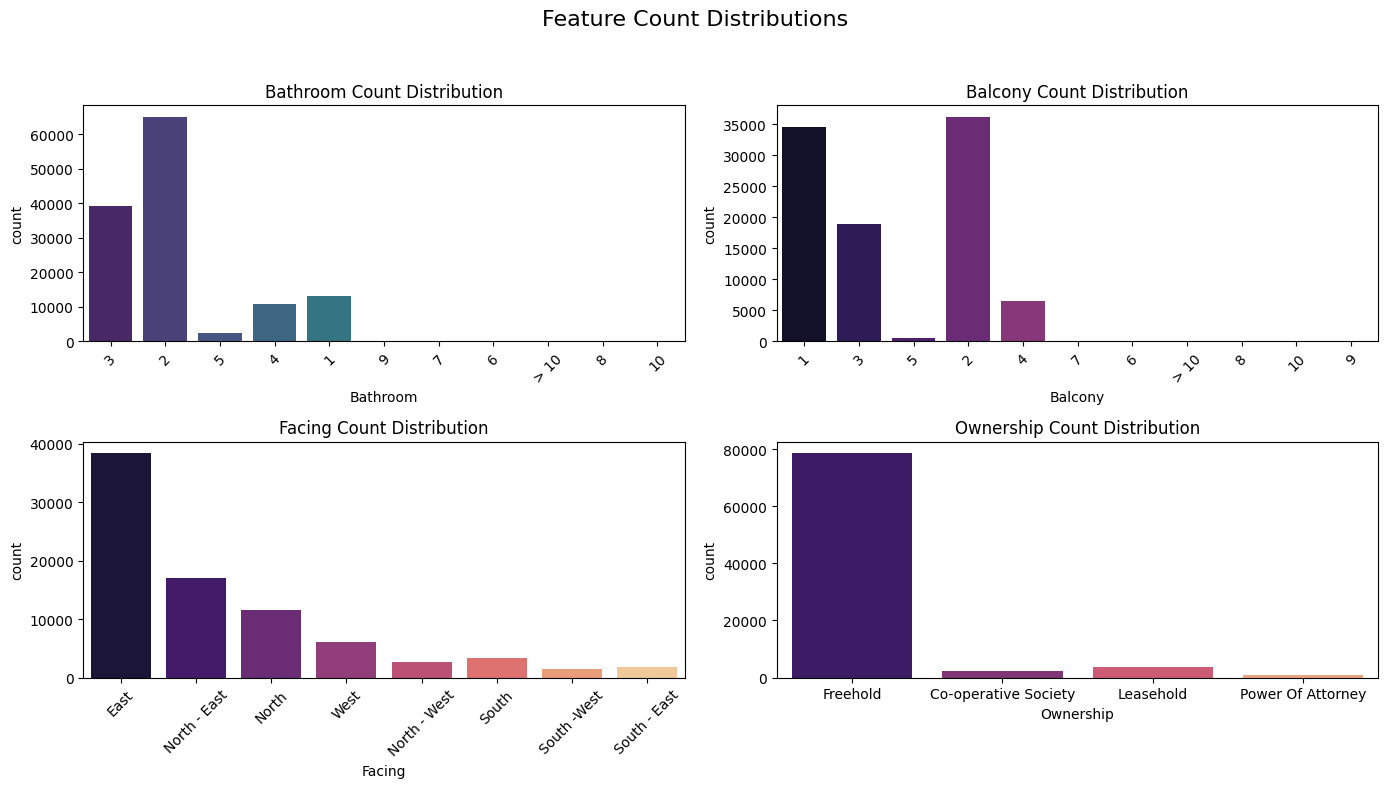

In [10]:
# Define subplot configuration
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("Feature Count Distributions", fontsize=16)

# Define features and palettes for plotting
features = [
    ("Bathroom", "viridis"),
    ("Balcony", "magma"),
    ("Facing", "magma"),
    ("Ownership", "magma")
]

# Flatten axes for easy iteration
axes_flat = axes.flatten()

# Loop through features and plot
for i, (feature, palette) in enumerate(features):
    ax = axes_flat[i]
    sns.countplot(data=df_train_cleaned, x=feature, hue=feature, palette=palette, legend=False, ax=ax)
    ax.set_title(f"{feature} Count Distribution")

    # Rotate x-tick labels if many categories
    if df_train_cleaned[feature].nunique() > 5:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Hide the unused subplot if any
if len(features) < len(axes_flat):
    for j in range(len(features), len(axes_flat)):
        axes_flat[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [11]:
# Replace '> 10' with 11 Bathroom and Balcony columns in the train dataset
df_train_cleaned['Bathroom'] = df_train_cleaned['Bathroom'].map(
    lambda x: 11 if isinstance(x, str) and x.strip() == '> 10' else x
)
df_train_cleaned['Balcony'] = df_train_cleaned['Balcony'].map(
    lambda x: 11 if isinstance(x, str) and x.strip() == '> 10' else x
)

# Fixing Bathroom and Balcony columns in the test dataset
df_test_cleaned['Bathroom'] = df_test_cleaned['Bathroom'].map(
    lambda x: 11 if isinstance(x, str) and x.strip() == '> 10' else x
)
df_test_cleaned['Balcony'] = df_test_cleaned['Balcony'].map(
    lambda x: 11 if isinstance(x, str) and x.strip() == '> 10' else x
)

#Replace explicit null values in 'Facing' & 'Overlooking' with 'Unknown'
cols_to_fill_unknown = ['Facing', 'Overlooking','Ownership']
df_train_cleaned[cols_to_fill_unknown] = df_train_cleaned[cols_to_fill_unknown].fillna('Unknown')
df_test_cleaned[cols_to_fill_unknown] = df_test_cleaned[cols_to_fill_unknown].fillna('Unknown')

#Very Less NaN Cases 0.02% to 1.56% : Remove rows with NaN values in 'Transaction', 'Bathroom', 'Furnishing' columns since %
df_train_cleaned = df_train_cleaned.dropna(subset=['Transaction', 'Bathroom', 'Furnishing','Bhk'])
df_test_cleaned = df_test_cleaned.dropna(subset=['Transaction', 'Bathroom', 'Furnishing','Bhk'])

In [12]:
analyze_missing_value(df_train_cleaned)

,Column Name,Data Type,Unique Values,Total Rows,Explicit Nulls,Implicit Nulls,Total Nulls,Null Percentage
0,Price,object,1478,128550,0,0,0,0.00
1,Location,object,81,128550,0,0,0,0.00
2,Carpet Area,object,2462,128550,54321,0,54321,42.26
3,Floor,object,884,128550,4406,0,4406,3.43
4,Transaction,object,4,128550,0,0,0,0.00
5,Furnishing,object,3,128550,0,0,0,0.00
6,Facing,object,9,128550,0,0,0,0.00
7,Overlooking,object,20,128550,0,0,0,0.00
8,Bathroom,object,11,128550,0,0,0,0.00
9,Balcony,object,11,128550,32516,0,32516,25.29


## 📌`Fixing Data Types`

In [13]:
#Converting Balcony dataype to int
df_train_cleaned['Balcony'] = pd.to_numeric(df_train_cleaned['Balcony'], errors='coerce').fillna(0).astype(int)
df_test_cleaned['Balcony'] = pd.to_numeric(df_test_cleaned['Balcony'], errors='coerce').fillna(0).astype(int)

df_train_cleaned['Bathroom'] = pd.to_numeric(df_train_cleaned['Bathroom'], errors='coerce').fillna(0).astype(int)
df_test_cleaned['Bathroom'] = pd.to_numeric(df_test_cleaned['Bathroom'], errors='coerce').fillna(0).astype(int)

df_train_cleaned['Bhk'] = df_train_cleaned['Bhk'].astype(int)
df_test_cleaned['Bhk'] = df_test_cleaned['Bhk'].astype(int)

#Replace explicit null values in 'Balcony' with Mean
df_train_cleaned['Balcony'] = df_train_cleaned['Balcony'].fillna(df_train_cleaned['Balcony'].mean())
df_test_cleaned['Balcony'] = df_test_cleaned['Balcony'].fillna(df_test_cleaned['Balcony'].mean())

There are below listed columns which are caterogical, but they have numerical values hiden in them, example 12.6 lac, 1345 sqf, 1 out of 3 floor, etc

- Carpet Area
- Price
- Super Area
- Floor
- Overlooking

In [14]:
#Sorting internal values of Overlooking Column
def sort_cell_items(df, col, delimiter=','):
    if col in df.columns:
        # Apply sorting within each cell
        df[col] = df[col].apply(
            lambda x: delimiter.join(sorted([item.strip() for item in str(x).split(delimiter)]))
        )
    return df

sort_cell_items(df_train_cleaned, 'Overlooking')
sort_cell_items(df_test_cleaned, 'Overlooking')

df_train_cleaned['Overlooking'].value_counts()

Overlooking
Unknown                                     54393
Main Road                                   22532
Garden/Park,Main Road                       19557
Garden/Park                                 16069
Garden/Park,Main Road,Pool                  12191
Garden/Park,Pool                             2273
Main Road,Pool                                804
Pool                                          726
Main Road,Not Available                         2
Garden/Park,Not Available                       1
Garden/Park,Main Road,Not Available,Pool        1
Main Road,Not Available,Pool                    1
Name: count, dtype: int64

In [15]:
# Define the possible tags you want to track
tags = ['Main Road', 'Garden/Park', 'Pool', 'Unknown','Not Available']

# For each tag, create a binary column based on presence in Overlooking
for tag in tags:
    df_train_cleaned[tag] = df_train_cleaned['Overlooking'].apply(lambda x: 1 if tag in x.split(',') else 0)
    df_test_cleaned[tag] = df_test_cleaned['Overlooking'].apply(lambda x: 1 if tag in x.split(',') else 0)

df_train_cleaned = df_train_cleaned.drop(['Overlooking','Unknown','Not Available'], axis='columns')
df_test_cleaned = df_test_cleaned.drop(['Overlooking','Unknown','Not Available'], axis='columns')



In [16]:
def split_column_by_first_space(df, column_name):
    # Split only on the first space
    split_data = df[column_name].astype(str).str.split(' ', n=1, expand=True)

    # Name the new columns dynamically based on the original column
    part1_col = f"{column_name} Part 1"
    part2_col = f"{column_name} Part 2"

    # Assign back to DataFrame
    df[part1_col] = split_data[0]
    df[part2_col] = split_data[1]

    return df

df_train_cleaned = split_column_by_first_space(df_train_cleaned, 'Carpet Area')
df_test_cleaned = split_column_by_first_space(df_test_cleaned, 'Carpet Area')
df_train_cleaned = df_train_cleaned.drop('Carpet Area', axis='columns')
df_test_cleaned = df_test_cleaned.drop('Carpet Area', axis='columns')

df_train_cleaned = split_column_by_first_space(df_train_cleaned, 'Super Area')
df_test_cleaned = split_column_by_first_space(df_test_cleaned, 'Super Area')
df_train_cleaned = df_train_cleaned.drop('Super Area', axis='columns')
df_test_cleaned = df_test_cleaned.drop('Super Area', axis='columns')

df_train_cleaned = split_column_by_first_space(df_train_cleaned, 'Price')
df_test_cleaned = split_column_by_first_space(df_test_cleaned, 'Price')
df_train_cleaned = df_train_cleaned.drop('Price', axis='columns')
df_test_cleaned = df_test_cleaned.drop('Price', axis='columns')

df_train_cleaned = split_column_by_first_space(df_train_cleaned, 'Floor')
df_test_cleaned = split_column_by_first_space(df_test_cleaned, 'Floor')
df_train_cleaned = df_train_cleaned.drop('Floor', axis='columns')
df_test_cleaned = df_test_cleaned.drop('Floor', axis='columns')

In [17]:
#Value Distribution
def value_distribution(df, column):
    value_counts = df[column].value_counts(normalize=True) * 100
    table = pd.DataFrame({'Value': value_counts.index, 'Percentage': value_counts.values})
    return table

result_carpet_area = value_distribution(df_train_cleaned, 'Carpet Area Part 2')
result_super_area = value_distribution(df_train_cleaned, 'Super Area Part 2')
result_price = value_distribution(df_train_cleaned, 'Price Part 2')

print('Carpet Area')
print(result_carpet_area)

print('\nSuper Area')
print(result_super_area)

print('\nPrice')
print(result_price)



Carpet Area
   Value  Percentage
0   sqft   93.863584
1  sqyrd    5.299815
2    sqm    0.827170
3  marla    0.002694
4  kanal    0.002694
5   acre    0.001347
6  bigha    0.001347
7   cent    0.001347

Super Area
     Value  Percentage
0     sqft   94.383410
1    sqyrd    4.494009
2      sqm    1.100461
3    marla    0.007373
4    kanal    0.003687
5   ground    0.003687
6     acre    0.001843
7  hectare    0.001843
8   biswa2    0.001843
9     cent    0.001843

Price
       Value  Percentage
0       Lac    60.243485
1        Cr    35.265655
2  for Price    4.490860


In [18]:
#Removed rows which is having no prices in it.
df_train_cleaned = df_train_cleaned[~df_train_cleaned["Price Part 2"].astype(str).str.lower().eq("for price")]
df_test_cleaned = df_test_cleaned[~df_test_cleaned["Price Part 2"].astype(str).str.lower().eq("for price")]

In [19]:
#Define unit conversion factors to sqft
conversion_factors = {
    'sqft': 1,
    'sqyrd': 9.0,
    'sqm': 10.7639,
    'acre': 43560,
    'ground': 2400,
    'cent': 435.6,
    'bigha': 27225,
    'marla': 272.25,
    'kanal': 5445,
    'biswa2': 1350,
    'aankadam': 75.0,
    'hectare': 107639,
    'lac' : 100000,
    'cr' : 10000000
}

#Convert any convertible unit into sqft, based on the two-part split
def convert_area_parts_to_sqft(df, value_col, unit_col, new_col_name, conversion_factors):

    # Make sure value_col is numeric
    df[value_col] = pd.to_numeric(df[value_col], errors='coerce')

    # Standardize unit text
    df[unit_col] = df[unit_col].str.strip().str.lower()

    # Apply conversion
    df[new_col_name] = df.apply(
        lambda row: row[value_col] * conversion_factors[row[unit_col]]
        if row[unit_col] in conversion_factors and pd.notnull(row[value_col])
        else None,
        axis=1
    )

    df = df.drop(columns=[unit_col,value_col],axis= 1)

    return df

# Carpet Area conversion
df_train_cleaned = convert_area_parts_to_sqft(df_train_cleaned, 'Carpet Area Part 1', 'Carpet Area Part 2', 'Carpet Area', conversion_factors)
df_test_cleaned = convert_area_parts_to_sqft(df_test_cleaned, 'Carpet Area Part 1', 'Carpet Area Part 2', 'Carpet Area', conversion_factors)


# Super Area conversion (if similarly split into Part 1 and Part 2)
df_train_cleaned = convert_area_parts_to_sqft(df_train_cleaned, 'Super Area Part 1', 'Super Area Part 2', 'Super Area', conversion_factors)
df_test_cleaned = convert_area_parts_to_sqft(df_test_cleaned, 'Super Area Part 1', 'Super Area Part 2', 'Super Area', conversion_factors)


# Price conversion (if similarly split into Part 1 and Part 2)
df_train_cleaned = convert_area_parts_to_sqft(df_train_cleaned, 'Price Part 1', 'Price Part 2', 'Price', conversion_factors)
df_test_cleaned = convert_area_parts_to_sqft(df_test_cleaned, 'Price Part 1', 'Price Part 2', 'Price', conversion_factors)

In most cases carpet area is 70% of super area.

Refrence : “What Is Carpet Area, Built-up Area and Super Built-up Area? | ICICI Blogs.” ICICI Bank, 2022, www.icicibank.com/knowledge-hub/blog all-about-carpet-area-built-up-area-and-super-built-up-area.

In [20]:
# Replace null values in 'Carpet Area' with 70% of the corresponding 'Super Area' value
df_train_cleaned['Carpet Area'] = df_train_cleaned['Carpet Area'].fillna(df_train_cleaned['Super Area'] * 0.7)
df_test_cleaned['Carpet Area'] = df_test_cleaned['Carpet Area'].fillna(df_test_cleaned['Super Area'] * 0.7)

# Removing 'Super Area' Column
df_train_cleaned = df_train_cleaned.drop('Super Area', axis=1)
df_test_cleaned = df_test_cleaned.drop('Super Area', axis=1)

# Remove Remaining Nulls from 'Carpet Area'
df_train_cleaned = df_train_cleaned.dropna(subset=['Carpet Area'])
df_test_cleaned = df_test_cleaned.dropna(subset=['Carpet Area'])

In [21]:
#Removing Floor Part 2 Column
df_train_cleaned = df_train_cleaned.drop('Floor Part 2', axis=1)
df_test_cleaned = df_test_cleaned.drop('Floor Part 2', axis=1)

# Rename 'Floor Part 1' to 'Floor'
df_train_cleaned = df_train_cleaned.rename(columns={'Floor Part 1': 'Floor'})
df_test_cleaned = df_test_cleaned.rename(columns={'Floor Part 1': 'Floor'})

df_train_cleaned['Floor'] = df_train_cleaned['Floor'].replace('Ground', '0')
df_test_cleaned['Floor'] = df_test_cleaned['Floor'].replace('Ground', '0')

df_train_cleaned['Floor'] = df_train_cleaned['Floor'].replace('Upper', '0')
df_test_cleaned['Floor'] = df_test_cleaned['Floor'].replace('Upper', '0')

df_train_cleaned['Floor'] = df_train_cleaned['Floor'].replace('Lower', '-1')
df_test_cleaned['Floor'] = df_test_cleaned['Floor'].replace('Lower', '-1')

df_train_cleaned['Floor'] = pd.to_numeric(df_train_cleaned['Floor'], errors='coerce')
df_test_cleaned['Floor'] = pd.to_numeric(df_test_cleaned['Floor'], errors='coerce')

#Setting it to Median to save it become outliers, also the unique count is less so it will act like Classification label than Numeric
df_train_cleaned['Floor'] = df_train_cleaned['Floor'].fillna(df_train_cleaned['Floor'].median())
df_test_cleaned['Floor'] = df_test_cleaned['Floor'].fillna(df_test_cleaned['Floor'].median())

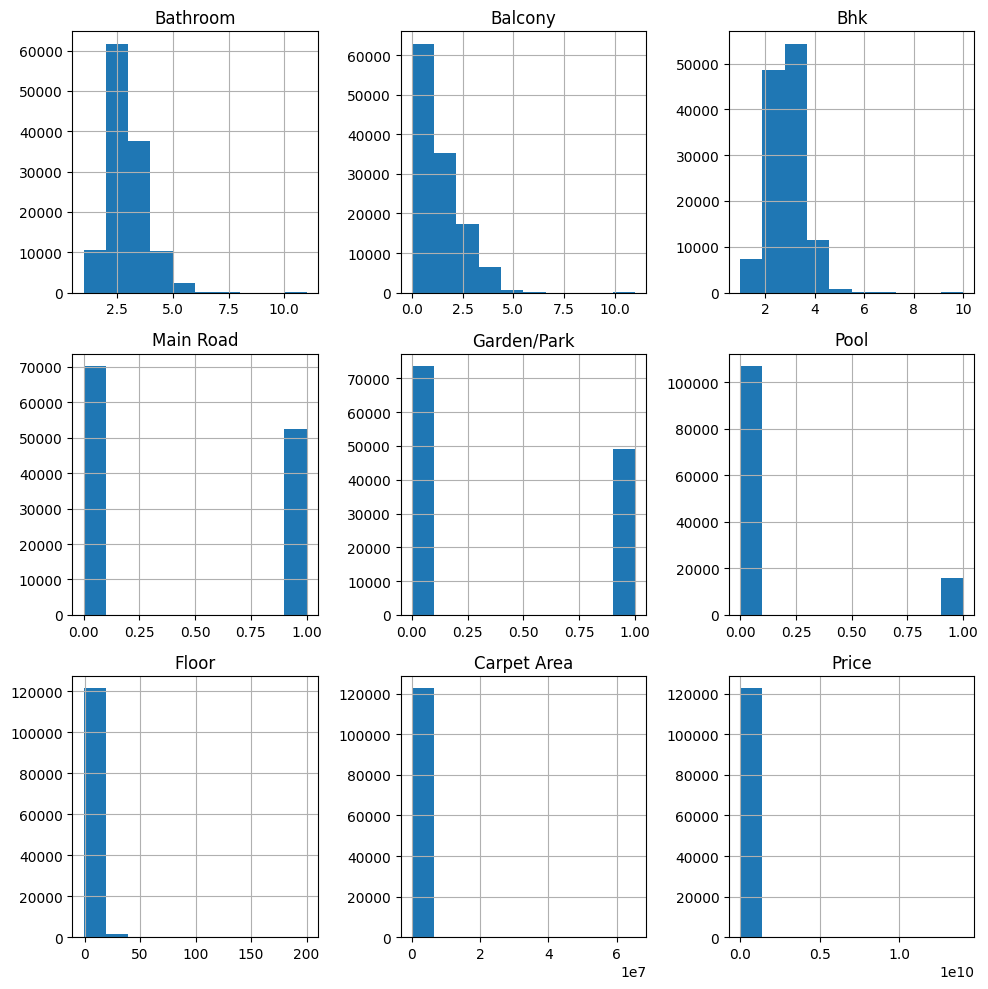

In [22]:
df_train_cleaned.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

In [23]:
result_transaction = value_distribution(df_train_cleaned, 'Transaction')
result_furnishing = value_distribution(df_train_cleaned, 'Furnishing')
result_facing = value_distribution(df_train_cleaned, 'Facing')
result_ownership = value_distribution(df_train_cleaned, 'Ownership')

print('Transaction')
print(result_transaction)

print('\nFurnishing')
print(result_furnishing)

print('\nFacing')
print(result_facing)

print('\nOwnership')
print(result_ownership)

Transaction
          Value  Percentage
0        Resale   75.883681
1  New Property   23.707181
2         Other    0.408323
3    Rent/Lease    0.000815

Furnishing
            Value  Percentage
0  Semi-Furnished   47.076131
1     Unfurnished   41.903225
2       Furnished   11.020644

Facing
          Value  Percentage
0       Unknown   36.091347
1          East   29.807575
2  North - East   13.375225
3         North    8.707629
4          West    4.807779
5         South    2.481723
6  North - West    2.130451
7  South - East    1.445023
8   South -West    1.153247

Ownership
                  Value  Percentage
0              Freehold   60.735796
1               Unknown   33.934000
2             Leasehold    2.892491
3  Co-operative Society    1.849271
4     Power Of Attorney    0.588441


In [24]:
#Function to analyse all Explicit & Implicit null values, Unique Values & Total Rows
def analyze_missing_value_2(df):
    summary = {
        "Column Name": df.columns.tolist() + ["Total"],
        "Data Type": [df[col].dtype for col in df.columns] + [": -"],
        "Unique Values": [df[col].nunique() for col in df.columns] + [""],
        "Total Rows": [len(df)] * (len(df.columns) + 1),
        "Explicit Nulls": [df[col].isna().sum() for col in df.columns] + [df.isna().sum().sum()],
    }

    implicit_nulls = []
    for col in df.columns:
        col_data = df[col].astype(str).str.strip()
        count = col_data.isin(["NA", "", "-", " "]).sum()
        implicit_nulls.append(count)

    total_implicit = sum(implicit_nulls)

    summary["Implicit Nulls"] = implicit_nulls + [total_implicit]

    summary["Total Nulls"] = [
        summary["Explicit Nulls"][i] + summary["Implicit Nulls"][i]
        for i in range(len(df.columns))
    ] + [summary["Explicit Nulls"][-1] + total_implicit]

    summary["Null Percentage"] = [
        round(((summary["Total Nulls"][i] / summary["Total Rows"][i]) * 100), 2)
        if summary["Total Rows"][i] != 0 else None
        for i in range(len(summary["Total Nulls"]))
    ]

    return pd.DataFrame(summary)

analyze_missing_value_2(df_train_cleaned)

,Column Name,Data Type,Unique Values,Total Rows,Explicit Nulls,Implicit Nulls,Total Nulls,Null Percentage
0,Location,object,81,122697,0,0,0,0.0
1,Transaction,object,4,122697,0,0,0,0.0
2,Furnishing,object,3,122697,0,0,0,0.0
3,Facing,object,9,122697,0,0,0,0.0
4,Bathroom,int64,11,122697,0,0,0,0.0
5,Balcony,int64,12,122697,0,0,0,0.0
6,Ownership,object,5,122697,0,0,0,0.0
7,Bhk,int64,10,122697,0,0,0,0.0
8,Main Road,int64,2,122697,0,0,0,0.0
9,Garden/Park,int64,2,122697,0,0,0,0.0


## 📌`Handle Anamolies`


In [25]:
analyze_anomalies(df_train_cleaned)

,Column Name,Data Type,Anomaly Count (IQR),Is Datatype Consistet
0,Location,object,0,0
1,Transaction,object,0,0
2,Furnishing,object,0,0
3,Facing,object,0,0
4,Bathroom,int64,2480,0
5,Balcony,int64,121,0
6,Ownership,object,0,0
7,Bhk,int64,878,0
8,Main Road,int64,0,0
9,Garden/Park,int64,0,0


In [26]:
def cap_outliers(df):
    """Caps outliers using the IQR method instead of removing them."""
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

    # Calculate Q1, Q3, and IQR for each numerical feature
    Q1 = df[numerical_features].quantile(0.25)
    Q3 = df[numerical_features].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values outside the range
    df[numerical_features] = df[numerical_features].clip(lower=lower_bound, upper=upper_bound, axis=1)

    return df


df_train_outlier_removed = cap_outliers(df_train_cleaned)
df_test_outlier_removed = cap_outliers(df_test_cleaned)

df_train_outlier_removed['Bhk'] = df_train_outlier_removed['Bhk'].round().astype(int)
df_test_outlier_removed['Bhk'] = df_test_outlier_removed['Bhk'].round().astype(int)


analyze_anomalies(df_train_outlier_removed)

,Column Name,Data Type,Anomaly Count (IQR),Is Datatype Consistet
0,Location,object,0,0
1,Transaction,object,0,0
2,Furnishing,object,0,0
3,Facing,object,0,0
4,Bathroom,float64,0,0
5,Balcony,int64,0,0
6,Ownership,object,0,0
7,Bhk,int64,0,0
8,Main Road,int64,0,0
9,Garden/Park,int64,0,0


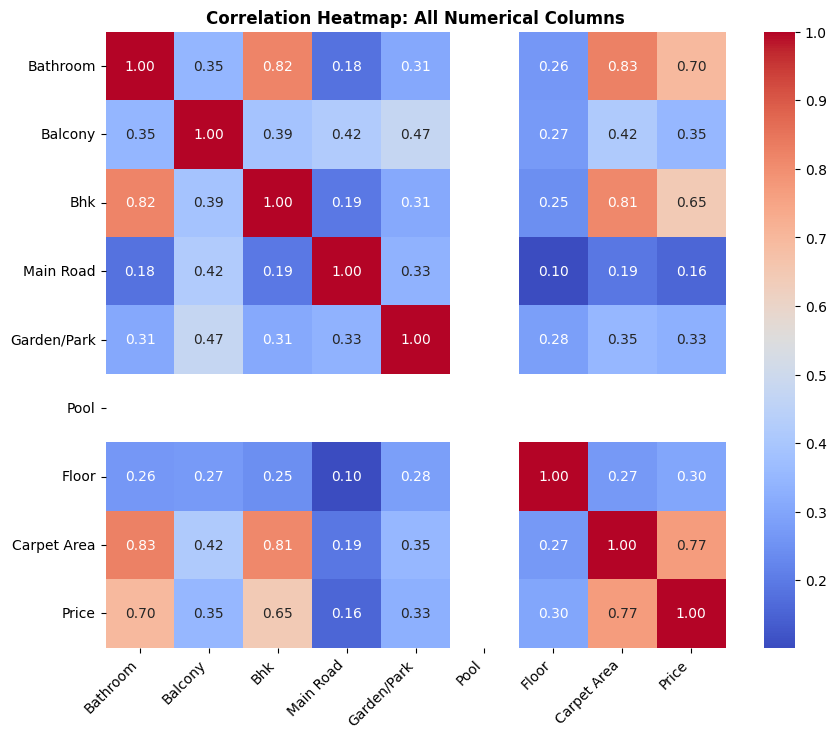

In [27]:
numeric_cols = df_train_outlier_removed.select_dtypes(include=['number'])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: All Numerical Columns',fontweight='bold')
plt.xticks(rotation=45,ha='right')
plt.show()

In [28]:
#Removed Pool as it was not having any strong correlation

df_train_outlier_removed.drop('Pool', axis=1, inplace = True)
df_test_outlier_removed.drop('Pool', axis=1, inplace = True)

In [29]:
df_train_outlier_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122697 entries, 15501 to 121958
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Location     122697 non-null  object 
 1   Transaction  122697 non-null  object 
 2   Furnishing   122697 non-null  object 
 3   Facing       122697 non-null  object 
 4   Bathroom     122697 non-null  float64
 5   Balcony      122697 non-null  int64  
 6   Ownership    122697 non-null  object 
 7   Bhk          122697 non-null  int64  
 8   Main Road    122697 non-null  int64  
 9   Garden/Park  122697 non-null  int64  
 10  Floor        122697 non-null  float64
 11  Carpet Area  122697 non-null  float64
 12  Price        122697 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 13.1+ MB


In [30]:
# Convert binary values in 'Main Road' column to readable text
df_train_outlier_removed['Main Road'] = df_train_outlier_removed['Main Road'].map({0: 'No', 1: 'Yes'})
df_test_outlier_removed['Main Road'] = df_test_outlier_removed['Main Road'].map({0: 'No', 1: 'Yes'})

# Convert binary values in 'Garden/Park' column to readable text
df_train_outlier_removed['Garden/Park'] = df_train_outlier_removed['Garden/Park'].map({0: 'No', 1: 'Yes'})
df_test_outlier_removed['Garden/Park'] = df_test_outlier_removed['Garden/Park'].map({0: 'No', 1: 'Yes'})

# Convert 'Floor' column to integer type
df_train_outlier_removed['Floor'] = df_train_outlier_removed['Floor'].astype(int)
df_test_outlier_removed['Floor'] = df_test_outlier_removed['Floor'].astype(int)

## **Summary of the Correlation Heatmap:**
### Strong Positive Correlations:
- Bathroom & Carpet Area (0.83): Larger carpet areas tend to have more bathrooms.
- Carpet Area & Price (0.77): Bigger carpet areas generally lead to higher prices.
- Bathroom & Price (0.70): More bathrooms correlate with higher property prices.
- Moderate Positive Correlations:
- Balcony & Carpet Area (0.42): Slight increase in balconies as carpet area increases.
- Balcony & Price (0.35): More balconies slightly influence higher property prices.
- Bathroom & Balcony (0.35): More bathrooms may indicate a slightly higher number of balconies.

### Weak Correlations:
- Floor with all variables (≤ 0.30): The floor level does not significantly impact the number of bathrooms, balconies, carpet area, or price.

# **Stage 4️⃣ : Feature Engineering**

In [31]:
#Spliting Feauter Vectors and Target Label
y_train = df_train_outlier_removed['Price']
x_train = df_train_outlier_removed.drop('Price', axis=1)

y_test = df_test_outlier_removed['Price']
x_test = df_test_outlier_removed.drop('Price', axis=1)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((122697, 12), (122697,), (52582, 12), (52582,))

In [32]:
x_train.dtypes

Location        object
Transaction     object
Furnishing      object
Facing          object
Bathroom       float64
Balcony          int64
Ownership       object
Bhk              int64
Main Road       object
Garden/Park     object
Floor            int64
Carpet Area    float64
dtype: object

In [33]:
for col in x_train.select_dtypes(include=['object']).columns:
    print(f"{col}: {x_train[col].nunique()} unique values")

Location: 81 unique values
Transaction: 4 unique values
Furnishing: 3 unique values
Facing: 9 unique values
Ownership: 5 unique values
Main Road: 2 unique values
Garden/Park: 2 unique values


In [34]:
x_train['Ownership'].unique()


array(['Freehold', 'Co-operative Society', 'Unknown', 'Leasehold',
       'Power Of Attorney'], dtype=object)

In [35]:
# Define the numerical and categorical columns
numerical_cols = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = x_train.select_dtypes(include=['object']).columns

print(f'Categorical Col : {list(categorical_cols)} \nNumerical Col : {list(numerical_cols)}')

# Create ColumnTransformer
ct =ColumnTransformer(
    transformers=[
        ('scaling', StandardScaler(), numerical_cols),
        ('onehot', OneHotEncoder(drop='first'), categorical_cols)  # drop='first' to avoid multicollinearity
    ]
)

# Apply ColumnTransformer to training data
x_train_transformed = ct.fit_transform(x_train)

# Apply the same transformation to test data
x_test_transformed = ct.transform(x_test)

# Check the shapes of the transformed datasets
print(f"Shape of x_train after transformation: {x_train_transformed.shape}")
print(f"Shape of y_train after transformation: {y_train.shape}")
print(f"Shape of x_test after transformation: {x_test_transformed.shape}")
print(f"Shape of y_test after transformation: {y_test.shape}")


Categorical Col : ['Location', 'Transaction', 'Furnishing', 'Facing', 'Ownership', 'Main Road', 'Garden/Park'] 
Numerical Col : ['Bathroom', 'Balcony', 'Bhk', 'Floor', 'Carpet Area']
Shape of x_train after transformation: (122697, 104)
Shape of y_train after transformation: (122697,)
Shape of x_test after transformation: (52582, 104)
Shape of y_test after transformation: (52582,)


# **Stage 5️⃣ : Model Training**

In [36]:
# Ensure that features and labels are split together in a way that the row count matches
x_test, x_valid, y_test, y_valid = train_test_split( x_test_transformed, y_test, test_size=0.5, random_state=42)

# Check the shapes after the split
print(x_valid.shape, y_valid.shape, x_test.shape, y_test.shape)


(26291, 104) (26291,) (26291, 104) (26291,)


### **Step 1: Run all models with default parameters (Baseline Evaluation)**

In [37]:
#Linear Regression (Baseline)
model_lr = LinearRegression()
model_lr.fit(x_train_transformed, y_train)
y_pred_lr = model_lr.predict(x_valid)
rmse_lr = np.sqrt(mean_squared_error(y_valid, y_pred_lr))
r2_lr = r2_score(y_valid, y_pred_lr)

#LightGBM Regression
model_lgb = lgb.LGBMRegressor(objective='regression', metric='l2')
model_lgb.fit(x_train_transformed, y_train)
y_pred_lgb = model_lgb.predict(x_valid)
rmse_lgb = np.sqrt(mean_squared_error(y_valid, y_pred_lgb))
r2_lgb = r2_score(y_valid, y_pred_lr)

#ElasticNet Regression
model_en = ElasticNet()
model_en.fit(x_train_transformed, y_train)
y_pred_en = model_en.predict(x_valid)
rmse_en = np.sqrt(mean_squared_error(y_valid, y_pred_en))
r2_en = r2_score(y_valid, y_pred_lr)

#XGBoost Regression
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
model_xgb.fit(x_train_transformed, y_train)
y_pred_xgb = model_xgb.predict(x_valid)
rmse_xgb = np.sqrt(mean_squared_error(y_valid, y_pred_xgb))
r2_xgb = r2_score(y_valid, y_pred_lr)

#Compare Performance
results = pd.DataFrame({
    "Model": ["Linear Regression", "LightGBM", "ElasticNet", "XGBoost"],
    "RMSE": [rmse_lr, rmse_lgb, rmse_en, rmse_xgb],
    "R2": [r2_lr, r2_lgb, r2_en, r2_xgb]
}).sort_values(by="RMSE")

print("Baseline Model Performance (Lower RMSE is Better):")
print(results)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 475
[LightGBM] [Info] Number of data points in the train set: 122697, number of used features: 100
[LightGBM] [Info] Start training from score 10644818.169963


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Baseline Model Performance (Lower RMSE is Better):
               Model          RMSE        R2
3            XGBoost  2.057829e+06  0.747484
1           LightGBM  2.156820e+06  0.747484
0  Linear Regression  3.991601e+06  0.747484
2         ElasticNet  5.028701e+06  0.747484


#### ***Results indicate that XGBoost performs the best, followed by LightGBM. The ElasticNet model is the weakest, and Linear Regression also even struggled.***

# **Stage 6️⃣ : Model Evaluation**

## **We used RandomizedSearchCV instead of GridSearchCV for the following reasons:**

- **Efficiency**: RandomizedSearchCV samples a subset of hyperparameter combinations, saving time and resources.

- **Wide Range Exploration**: It explores the hyperparameter space more randomly, often finding good results faster, especially with large spaces.

- **Speed**: For large datasets and many hyperparameters, GridSearchCV is slow, while RandomizedSearchCV achieves near-optimal results in less time.

- **Practicality**: It provides a good balance between performance and time efficiency, making it ideal when under a time constraint.

In [38]:
#XGBoost Hyperparameter Grid
xgb_params = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [100, 500, 1000, 2000],
    "max_depth": [3, 6, 10, 15],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

#Tune XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
xgb_search = RandomizedSearchCV(xgb_model, xgb_params,
                          n_iter=10,
                          cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1,
                          random_state=42
                          )
xgb_search.fit(x_train_transformed, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.8, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 6, ...], 'n_estimators': [100, 500, ...], ...}"
,n_iter,10
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [39]:
best_xgb_params = xgb_search.best_params_
print("Best Hyperparameters for XGBoost:")
for param, value in best_xgb_params.items():
    print(f"\t{param}: {value}")


# Calculate RMSE (Root Mean Squared Error)
rmse_xgb_tuned = np.sqrt(mean_squared_error(y_valid, y_pred_xgb))

# Calculate Mean Absolute Error (MAE)
mae_xgb_tuned = mean_absolute_error(y_valid, y_pred_xgb)

# Calculate R-squared (R²) score
r2_xgb_tuned = r2_score(y_valid, y_pred_xgb)

# Print the tuned model's performance
print("\n",'- '*75,"\nPerformance After Hyperparameter Tuning:")
print(f"\tRMSE for Tuned XGBoost: {rmse_xgb_tuned}")
print(f"\tMAE for Tuned XGBoost: {mae_xgb_tuned}")
print(f"\tR² for Tuned XGBoost: {r2_xgb_tuned}")

Best Hyperparameters for XGBoost:
	subsample: 0.6
	n_estimators: 1000
	max_depth: 15
	learning_rate: 0.01
	colsample_bytree: 0.8

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
Performance After Hyperparameter Tuning:
	RMSE for Tuned XGBoost: 2057829.1038180718
	MAE for Tuned XGBoost: 1029785.9932533947
	R² for Tuned XGBoost: 0.9328858824158317


Final Recommendation
- ✅ Use LightGBM as the final model since it performs the best overall.
- ⚡ If you need a backup, XGBoost is a strong second choice.
- ❌ ElasticNet & Linear Regression are not suitable for this dataset.

In [40]:
# Initialize the XGBoost model with the best parameters
model_xgb_best = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', **best_xgb_params)

# Train the model on the transformed training data
model_xgb_best.fit(x_train_transformed, y_train)

# Make predictions on the test set (or validation set, based on your choice)
y_pred_xgb_best = model_xgb_best.predict(x_test)

# Calculate RMSE (Root Mean Squared Error)
rmse_xgb_best = np.sqrt(mean_squared_error(y_test, y_pred_xgb_best))

# Calculate MAE (Mean Absolute Error)
mae_xgb_best = mean_absolute_error(y_test, y_pred_xgb_best)

# Calculate R² (Coefficient of Determination)
r2_xgb_best = r2_score(y_test, y_pred_xgb_best)

# Print the evaluation metrics
print(f"RMSE for XGBoost with Best Hyperparameters on Test Set: {rmse_xgb_best}")
print(f"\tRMSE for Tuned XGBoost: {rmse_xgb_best}")
print(f"\tMAE for Tuned XGBoost: {mae_xgb_best}")
print(f"\tR² for Tuned XGBoost: {r2_xgb_best}")


RMSE for XGBoost with Best Hyperparameters on Test Set: 1912750.3804137935
	RMSE for Tuned XGBoost: 1912750.3804137935
	MAE for Tuned XGBoost: 860812.5135122285
	R² for Tuned XGBoost: 0.9418365277554143


# Deployement

In [43]:
categorical_features = [
    "Location",
    "Facing",
    "Ownership",
    "Furnishing",
    "Transaction",
    "Main Road",
    "Garden/Park",
]

numerical_features = [
    "Carpet Area",
    "Bathroom",
    "Balcony",
    "Floor",
    "Bhk"
]

target = "Price"   # ⚠️ change ONLY if your column name is different

In [44]:
X_train = df_train_outlier_removed[
    categorical_features + numerical_features
]
y_train = df_train_outlier_removed[target]

X_test = df_test_outlier_removed[
    categorical_features + numerical_features
]
y_test = df_test_outlier_removed[target]

In [45]:
preprocessor = ColumnTransformer(
    transformers=[
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore", sparse_output=False),
            categorical_features
        ),
        (
            "num",
            "passthrough",
            numerical_features
        )
    ]
)

In [49]:
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=15,
    learning_rate=0.01,
    subsample=0.6,
    colsample_bytree=0.8,
    random_state=42
)

pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", xgb_model)
])

pipeline.fit(X_train, y_train)


,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [50]:
import joblib
joblib.dump(pipeline, "model_xgb_pipeline.joblib")


['model_xgb_pipeline.joblib']

In [51]:
test_input = pd.DataFrame({
    "Location": ["bangalore"],
    "Facing": ["East"],
    "Ownership": ["Freehold"],
    "Furnishing": ["Semi-Furnished"],
    "Transaction": ["Resale"],
    "Carpet Area": [1000],
    "Bathroom": [2],
    "Balcony": [1],
    "Floor": [3],
    "Bhk": [3],
    "Main Road": ["Yes"],
    "Garden/Park": ["Yes"]
})

pipeline.predict(test_input)


array([9200049.], dtype=float32)